# Preprocessing

In [2]:
import pandas as pd 

In [3]:
import nltk

In [4]:
df = pd.read_csv('../raw_data/news_all.csv')

In [7]:
df.head()

,Text,Label
0,Amazon to create 500 new jobs in Mississippi a...,2
1,"GE's stock rises 1% premarket, set to trade ab...",2
2,"CN Rail Strike Begins, Threatening Canada Oil,...",0
3,"Hong Kong Airlines to cut 400 jobs, ask employ...",0
4,3 Top-Performing Mutual Funds to Consider for ...,1


In [8]:
df.shape

(11656, 2)

In [9]:
df['Label'].value_counts()

Label
1    8077
2    2033
0    1546
Name: count, dtype: int64

In [10]:
df.iloc[0]

Text     Amazon to create 500 new jobs in Mississippi a...
Label                                                    2
Name: 0, dtype: object

In [11]:
for i in range(5):
    print('Data: {}'.format(df.iloc[i]['Text']))
    print('Label: {}'.format(df.iloc[i]['Label']))     
    print('\n')

Data: Amazon to create 500 new jobs in Mississippi as it builds new fulfillment center
Label: 2


Data: GE's stock rises 1% premarket, set to trade above $13 for 1st time in regular-session hours since October 2018
Label: 2


Data: CN Rail Strike Begins, Threatening Canada Oil, Grain Shipments
Label: 0


Data: Hong Kong Airlines to cut 400 jobs, ask employees to take unpaid leave: SCMP
Label: 0


Data: 3 Top-Performing Mutual Funds to Consider for Your Retirement Portfolio- February 07, 2020
Label: 1




In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11656 entries, 0 to 11655
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    11656 non-null  object
 1   Label   11656 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 182.3+ KB


In [13]:
import re

In [14]:
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [15]:
def clean_text(text):

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(words)

    return cleaned_text

In [16]:
clean_text('WELCOME to this practical skills module!!')

'welcome practical skills module'

In [17]:
df['Cleaned Text'] = df['Text'].apply(clean_text)

In [18]:
df

,Text,Label,Cleaned Text
0,Amazon to create 500 new jobs in Mississippi a...,2,amazon create 500 new jobs mississippi builds ...
1,"GE's stock rises 1% premarket, set to trade ab...",2,ges stock rises 1 premarket set trade 13 1st t...
2,"CN Rail Strike Begins, Threatening Canada Oil,...",0,cn rail strike begins threatening canada oil g...
3,"Hong Kong Airlines to cut 400 jobs, ask employ...",0,hong kong airlines cut 400 jobs ask employees ...
4,3 Top-Performing Mutual Funds to Consider for ...,1,3 topperforming mutual funds consider retireme...
...,...,...,...
11651,"A record 449,553 Illinois residents sign up fo...",1,record 449553 illinois residents sign affordab...
11652,The Los Angeles Fires Will Put California’s Ne...,1,los angeles fires put californias new insuranc...
11653,"NexPoint Real Estate Finance, Inc. Enters into...",1,nexpoint real estate finance inc enters assign...
11654,AO Buzzard Agency Introduces Financial Service...,1,ao buzzard agency introduces financial service...


In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_word_cloud(text):
    custom_stopwords = {"http", "china", "us", "united states", "political", "politics","stock","stocks", "trump"}
    stopwords = set(STOPWORDS)
    stopwords.update(custom_stopwords)
    wordcloud = WordCloud(width = 1600, height = 800, stopwords = stopwords, min_font_size = 10).generate(text)
    plt.figure(figsize = (12, 12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [21]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

In [23]:
news_1 = "Hong Kong stocks increased 4% as China relaxes virus rules"
news_2 = "Novo Nordisk stock increased by 2% in today's trading session"
news_3 = "Amazon stock lost half its value this year as tech stocks got crushed and recession fears grew"

In [24]:
encoded_news_1 = tokenizer.encode(news_1)
print(encoded_news_1)

[101, 4291, 4290, 15768, 3445, 1018, 1003, 2004, 2859, 9483, 2229, 7865, 3513, 102]


In [25]:
encoded_news_2 = tokenizer.encode(news_2)
print(encoded_news_2)

[101, 24576, 13926, 20573, 4518, 3445, 2011, 1016, 1003, 1999, 2651, 1005, 1055, 6202, 5219, 102]


In [26]:
encoded_news_3 = tokenizer.encode(news_3)
print(encoded_news_3)

[101, 9733, 4518, 2439, 2431, 2049, 3643, 2023, 2095, 2004, 6627, 15768, 2288, 10560, 1998, 19396, 10069, 3473, 102]


In [27]:
print(encoded_news_1)
len(encoded_news_1)

[101, 4291, 4290, 15768, 3445, 1018, 1003, 2004, 2859, 9483, 2229, 7865, 3513, 102]


14

In [28]:
print(encoded_news_2)
len(encoded_news_2)

[101, 24576, 13926, 20573, 4518, 3445, 2011, 1016, 1003, 1999, 2651, 1005, 1055, 6202, 5219, 102]


16

In [29]:
print(encoded_news_3)
len(encoded_news_3)

[101, 9733, 4518, 2439, 2431, 2049, 3643, 2023, 2095, 2004, 6627, 15768, 2288, 10560, 1998, 19396, 10069, 3473, 102]


19

In [30]:
import torch
from torch.nn.utils.rnn import pad_sequence

In [31]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

def tokenization_padding(df):
    # 使用 tokenizer 批量处理文本，返回 `input_ids` 和 `attention_mask`
    encoded_inputs = tokenizer(
        df["Cleaned Text"].tolist(), 
        truncation=True,         # 截断到最大长度
        padding="max_length",            # 自动填充
        max_length=512,          # FinBERT 最大支持 512 tokens
        return_tensors="pt",     # 返回 PyTorch 张量
        return_attention_mask=True  # 生成 attention mask
    )

    df["Encoded Text"] = encoded_inputs["input_ids"].tolist()  # 转换为列表存入 DataFrame
    df["Attention Mask"] = encoded_inputs["attention_mask"].tolist()  # 存 attention_mask
    
    return encoded_inputs["input_ids"], encoded_inputs["attention_mask"]


In [32]:
X, attention_mask = tokenization_padding(df)
X

tensor([[  101,  9733,  3443,  ...,     0,     0,     0],
        [  101, 16216,  2015,  ...,     0,     0,     0],
        [  101, 27166,  4334,  ...,     0,     0,     0],
        ...,
        [  101, 11265,  2595,  ...,     0,     0,     0],
        [  101, 20118, 12610,  ...,     0,     0,     0],
        [  101,  3534, 28619,  ...,     0,     0,     0]])

In [33]:
X.shape

torch.Size([11656, 512])

In [34]:
# Let's define a Python Function that performs tokenization and padding to text data in DataFrames
def tokenization_padding(df):

    # Use Python List Comprehension to tokenize every row in the Pandas DataFrame "df" 
    df['Encoded Text'] = [tokenizer.encode(news) for news in df['Cleaned Text'].tolist()]

    # Convert data into tensors using List Comprehension and then perform Zero-Padding to ensure that data has the same length
    encoded_news_tensor = [torch.tensor(encoded_news) for encoded_news in df['Encoded Text'].tolist()]
    padded_sequence = pad_sequence(encoded_news_tensor, batch_first = True, padding_value = 0).numpy()

    return padded_sequence

In [35]:
X = tokenization_padding(df)
X

array([[  101,  9733,  3443, ...,     0,     0,     0],
       [  101, 16216,  2015, ...,     0,     0,     0],
       [  101, 27166,  4334, ...,     0,     0,     0],
       ...,
       [  101, 11265,  2595, ...,     0,     0,     0],
       [  101, 20118, 12610, ...,     0,     0,     0],
       [  101,  3534, 28619, ...,     0,     0,     0]])

In [37]:
X, attention_mask = tokenization_padding(df)  # 确保这里是正确的
print(f"X shape: {X.shape}, attention_mask shape: {attention_mask.shape}")

ValueError: too many values to unpack (expected 2)

In [38]:
df

,Text,Label,Cleaned Text,Encoded Text,Attention Mask
0,Amazon to create 500 new jobs in Mississippi as it builds new fulfillment center,2,amazon create 500 new jobs mississippi builds new fulfillment center,"[101, 9733, 3443, 3156, 2047, 5841, 5900, 16473, 2047, 29362, 2415, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,"GE's stock rises 1% premarket, set to trade above $13 for 1st time in regular-session hours since October 2018",2,ges stock rises 1 premarket set trade 13 1st time regularsession hours since october 2018,"[101, 16216, 2015, 4518, 9466, 1015, 26563, 17007, 3388, 2275, 3119, 2410, 3083, 2051, 24945, 7971, 3258, 2847, 2144, 2255, 2760, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,"CN Rail Strike Begins, Threatening Canada Oil, Grain Shipments",0,cn rail strike begins threatening canada oil grain shipments,"[101, 27166, 4334, 4894, 4269, 8701, 2710, 3514, 8982, 24636, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
3,"Hong Kong Airlines to cut 400 jobs, ask employees to take unpaid leave: SCMP",0,hong kong airlines cut 400 jobs ask employees take unpaid leave scmp,"[101, 4291, 4290, 7608, 3013, 4278, 5841, 3198, 5126, 2202, 23850, 2681, 8040, 8737, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
4,"3 Top-Performing Mutual Funds to Consider for Your Retirement Portfolio- February 07, 2020",1,3 topperforming mutual funds consider retirement portfolio february 07 2020,"[101, 1017, 2327, 4842, 14192, 2075, 8203, 5029, 5136, 5075, 11103, 2337, 5718, 12609, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
...,...,...,...,...,...
11651,"A record 449,553 Illinois residents sign up for Affordable Care Act insurance, amid uncertainty over future",1,record 449553 illinois residents sign affordable care act insurance amid uncertainty future,"[101, 2501, 4008, 2683, 24087, 2509, 4307, 3901, 3696, 15184, 2729, 2552, 5427, 13463, 12503, 2925, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
11652,The Los Angeles Fires Will Put California’s New Insurance Rules to the Test,1,los angeles fires put californias new insurance rules test,"[101, 3050, 3349, 8769, 2404, 2662, 2015, 2047, 5427, 3513, 3231, 102]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
y = df['Label'] 
y

0        2
1        2
2        0
3        0
4        1
        ..
11651    1
11652    1
11653    1
11654    1
11655    1
Name: Label, Length: 11656, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, shuffle = False)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, shuffle = False)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(6993, 61)
(2331, 61)
(2332, 61)
(6993,)
(2331,)
(2332,)


# FinBERT

In [42]:
class FinancialNewsDataset(Dataset):
    def __init__(self, X, attention_mask, y):
        # ✅ 直接使用已有的 Tensor，不要再 `torch.tensor()`
        self.X = X.clone().detach()  # 避免 UserWarning
        self.attention_mask = attention_mask.clone().detach()  # 避免 UserWarning
        self.y = torch.tensor(y.tolist(), dtype=torch.long)  # 这里需要转换

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.attention_mask[idx], self.y[idx]

NameError: name 'Dataset' is not defined

In [44]:
# 【检查】创建 `FinancialNewsDataset` 数据集
train_dataset = FinancialNewsDataset(X_train, attention_mask, y_train)

# 测试 Dataset 是否返回 3 个值
sample = train_dataset[0]  # 获取索引 0 的数据
print(f"Dataset sample type: {type(sample)}")
print(f"Dataset sample length: {len(sample)}")  # 期待是 3
print(f"X shape: {sample[0].shape}, attention_mask shape: {sample[1].shape}, y: {sample[2]}")

NameError: name 'FinancialNewsDataset' is not defined

In [45]:
# 加载预训练的 FinBERT（3 分类）
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert", num_labels=3)
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

NameError: name 'AutoModelForSequenceClassification' is not defined

In [118]:
# 创建 PyTorch Dataset
train_dataset = FinancialNewsDataset(X_train, y_train)
test_dataset = FinancialNewsDataset(X_test, y_test)
val_dataset = FinancialNewsDataset(X_val, y_val)

# 创建 DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [120]:
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
criterion = nn.CrossEntropyLoss()

/opt/anaconda3/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [148]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [79]:
# 先获取 tokenized 数据
X, attention_mask = tokenization_padding(df)
y = df["Label"]  # 你的标签

# 用 FinancialNewsDataset 创建 PyTorch 数据集
train_dataset = FinancialNewsDataset(X_train, attention_mask, y_train)
val_dataset = FinancialNewsDataset(X_val, attention_mask, y_val)
test_dataset = FinancialNewsDataset(X_test, attention_mask, y_test)

# 用 DataLoader 处理批量数据
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

NameError: name 'FinancialNewsDataset' is not defined

In [81]:
import transformers
import tensorflow as tf

In [83]:
def train_model(model, train_loader, val_loader, epochs=3):
    best_val_loss = float("inf")

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")

        # 训练模式
        model.train()
        train_loss = 0
        correct, total = 0, 0

        # **🔹 调试 batch 结构**
        for batch in train_loader:
            print(f"Batch length: {len(batch)}")  # 期待是 3
            print(f"Batch content types: {[type(b) for b in batch]}")  # 期待是 `torch.Tensor`
            break  # **确保 `train_loader` 没有被重复遍历**
        
        for batch in tqdm(train_loader):
            X_batch, attention_mask, y_batch = batch

            # **🔹 确保 `attention_mask_batch` 传递给 GPU**
            X_batch, attention_mask, y_batch = (
                X_batch.to(device), attention_mask.to(device), y_batch.to(device)
            )

            optimizer.zero_grad()
            outputs = model(input_ids=X_batch, attention_mask=attention_mask).logits
            loss = criterion(outputs, y_batch)

            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

        avg_train_loss = train_loss / len(train_loader)
        train_acc = correct / total

        # 评估模式
        model.eval()
        val_loss = 0
        correct, total = 0, 0
        with torch.no_grad():
            for batch in val_loader:
                X_batch, attention_mask, y_batch = batch
                X_batch, attention_mask, y_batch = (
                    X_batch.to(device), attention_mask.to(device), y_batch.to(device)
                )

                outputs = model(input_ids=X_batch, attention_mask=attention_mask).logits
                loss = criterion(outputs, y_batch)

                val_loss += loss.item()
                preds = torch.argmax(outputs, dim=1)
                correct += (preds == y_batch).sum().item()
                total += y_batch.size(0)

        avg_val_loss = val_loss / len(val_loader)
        val_acc = correct / total

        print(f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.4f}")

        # 保存最佳模型
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            save_keras_model(model, output_path="finbert_best_model")
            print("Best model saved!")

train_model(model, train_loader, val_loader, epochs=3)

NameError: name 'model' is not defined

# TRAIN A LONG SHORT-TERM MEMORY (LSTM) NEURAL NETWORK

In [195]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
import tensorflow as tf]\\
from tensorflow import keras

In [197]:
inputs = tf.keras.Input(shape = (X_train.shape[1],))


x = tf.keras.layers.Embedding(input_dim = tokenizer.vocab_size,
                              output_dim = 768,
                              )(inputs)

x = tf.keras.layers.LSTM(64, return_sequences = True, activation = 'tanh')(x)
x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)


In [199]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [201]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 61)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ (None, 61, 768)        │    23,440,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 61, 64)         │       213,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3904)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │        11,715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,665,859 (90.28 MB)

 Trainable params: 23,665,859 (90.28 MB)

 Non-trainable params: 0 (0.00 B)

In [132]:
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    batch_size = 32,
                    epochs = 3)

Epoch 1/3
180/180 ━━━━━━━━━━━━━━━━━━━━ 22s 116ms/step - accuracy: 0.6716 - loss: 0.8308 - val_accuracy: 0.7597 - val_loss: 0.6156
Epoch 2/3
180/180 ━━━━━━━━━━━━━━━━━━━━ 21s 116ms/step - accuracy: 0.8881 - loss: 0.3131 - val_accuracy: 0.7597 - val_loss: 0.7123
Epoch 3/3
180/180 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - accuracy: 0.9721 - loss: 0.0840 - val_accuracy: 0.7571 - val_loss: 0.8839


In [234]:
model.save('lstm_model.keras')

In [203]:
print(type(model))  # 检查模型类型

<class 'keras.src.models.functional.Functional'>


# Evaluating

In [217]:
results = model.evaluate(X_test, y_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6376 - loss: 1.0749


In [219]:
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Accuracy: 64.66%


In [160]:
from sklearn.metrics import f1_score, classification_report
y_pred_prob = model.predict(X_test)  
y_pred = y_pred_prob.argmax(axis=1)  
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"测试集上的 F1-Score: {f1:.4f}")
print("\n分类报告：")
print(classification_report(y_test, y_pred, target_names=["Positive", "Neutral", "Negative"]))

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
测试集上的 F1-Score: 0.7512

分类报告：
              precision    recall  f1-score   support

    Positive       0.51      0.49      0.50       277
     Neutral       0.84      0.86      0.85      1238
    Negative       0.64      0.61      0.63       395

    accuracy                           0.75      1910
   macro avg       0.66      0.65      0.66      1910
weighted avg       0.75      0.75      0.75      1910



In [184]:
predictions = model.predict(X_test)
predictions

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


array([[8.7386853e-01, 4.4876128e-02, 8.1255212e-02],
       [4.1766246e-03, 9.9504238e-01, 7.8097294e-04],
       [4.3300001e-04, 9.9882060e-01, 7.4637349e-04],
       ...,
       [2.1846138e-03, 1.7411473e-04, 9.9764132e-01],
       [7.2429684e-05, 9.9705148e-01, 2.8761411e-03],
       [2.0486831e-04, 9.9772316e-01, 2.0719944e-03]], dtype=float32)

In [186]:
import numpy as np
y_predict = []
for i in predictions:
  y_predict.append(np.argmax(i))
y_predict

[0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,


In [238]:
import numpy as np

# 保存为 NumPy 格式文件
np.savez('lstm_roc_data.npz', fpr=fpr, tpr=tpr, roc_auc=roc_auc)

print("ROC data has been saved to 'roc_data.npz'")

ROC data has been saved to 'roc_data.npz'


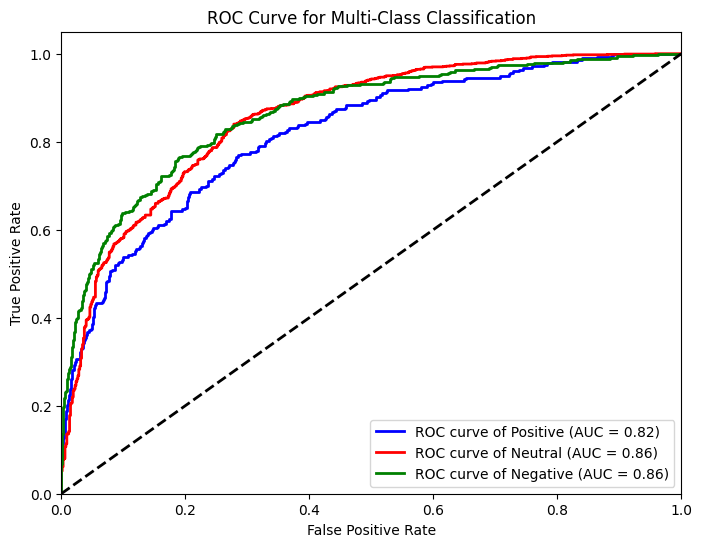

In [188]:
#lstm roc图
from sklearn.preprocessing import label_binarize

# 将真实标签二值化
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2]) 
n_classes = y_test_binarized.shape[1]  # 类别数
from sklearn.metrics import roc_curve, auc

# 初始化变量
fpr = dict()  # 假正率
tpr = dict()  # 真正率
roc_auc = dict()  # AUC 值

# 计算每个类别的 ROC 曲线和 AUC 值
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
import matplotlib.pyplot as plt

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # 每个类别的颜色
class_names = ['Positive', 'Neutral', 'Negative']  # 类别名称

for i, color, class_name in zip(range(n_classes), colors, class_names):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of {class_name} (AUC = {roc_auc[i]:.2f})')

# 绘制对角线
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# 设置图形属性
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

In [110]:
y_test

5729    2
5730    2
5731    2
5732    2
5733    0
       ..
7634    0
7635    0
7636    0
7637    2
7638    1
Name: Encoded Label, Length: 1910, dtype: int64

In [112]:
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.7 MB/s eta 0:00:00a 0:00:01m


<Axes: >

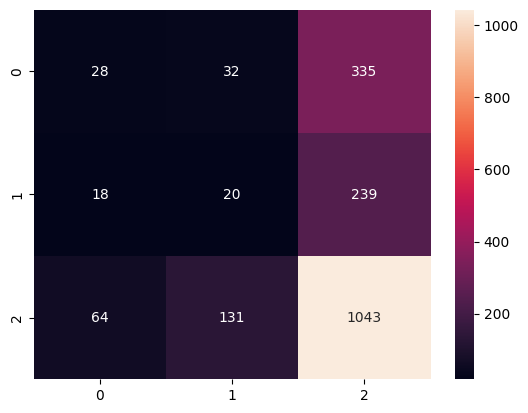

In [218]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, fmt = 'd', annot = True)

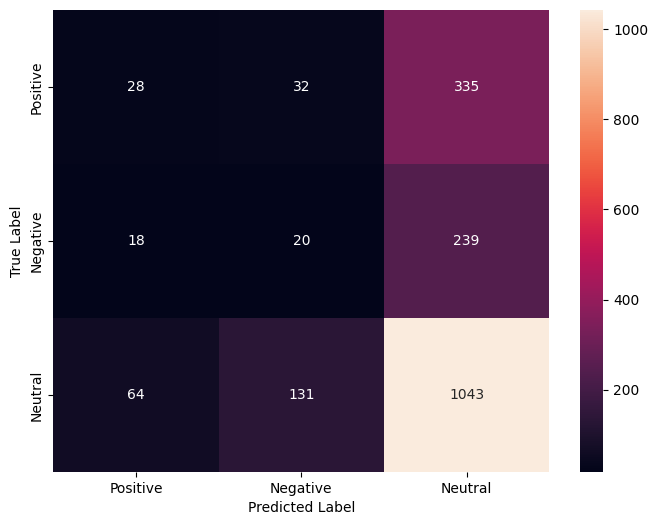

In [258]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=["Positive", "Negative", "Neutral"],
            yticklabels=["Positive", "Negative", "Neutral"])

plt.title("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

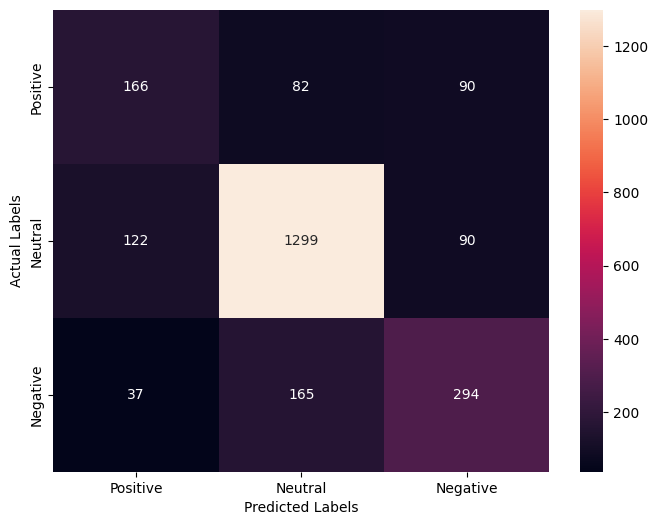

In [138]:
#lstm混淆矩阵
confusion_matrix = np.array([
    [166, 82, 90],  # 第一行：实际为 Positive（0）的分类结果
    [122, 1299, 90],  # 第二行：实际为 Negative（1）的分类结果
    [37, 165, 294]    # 第三行：实际为 Neutral（2）的分类结果
])
labels = ['Positive', 'Neutral', 'Negative']
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [223]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.51      0.49      0.50       277
           1       0.84      0.86      0.85      1238
           2       0.64      0.61      0.63       395

    accuracy                           0.75      1910
   macro avg       0.66      0.65      0.66      1910
weighted avg       0.75      0.75      0.75      1910



In [168]:
from transformers import AutoTokenizer, pipeline
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
sentiment_pipeline = pipeline("sentiment-analysis", model = "ProsusAI/finbert", tokenizer = tokenizer)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [166]:
df

,Text,Label,Cleaned Text,Encoded Text,Encoded Label
0,Amazon to create 500 new jobs in Mississippi a...,2,amazon create 500 new jobs mississippi builds ...,"[101, 9733, 3443, 3156, 2047, 5841, 5900, 1647...",positive
1,"GE's stock rises 1% premarket, set to trade ab...",2,ges stock rises 1 premarket set trade 13 1st t...,"[101, 16216, 2015, 4518, 9466, 1015, 26563, 17...",positive
2,"CN Rail Strike Begins, Threatening Canada Oil,...",0,cn rail strike begins threatening canada oil g...,"[101, 27166, 4334, 4894, 4269, 8701, 2710, 351...",negative
3,"Hong Kong Airlines to cut 400 jobs, ask employ...",0,hong kong airlines cut 400 jobs ask employees ...,"[101, 4291, 4290, 7608, 3013, 4278, 5841, 3198...",negative
4,3 Top-Performing Mutual Funds to Consider for ...,1,3 topperforming mutual funds consider retireme...,"[101, 1017, 2327, 4842, 14192, 2075, 8203, 502...",neutral
...,...,...,...,...,...
11651,"A record 449,553 Illinois residents sign up fo...",1,record 449553 illinois residents sign affordab...,"[101, 2501, 4008, 2683, 24087, 2509, 4307, 390...",neutral
11652,The Los Angeles Fires Will Put California’s Ne...,1,los angeles fires put californias new insuranc...,"[101, 3050, 3349, 8769, 2404, 2662, 2015, 2047...",neutral
11653,"NexPoint Real Estate Finance, Inc. Enters into...",1,nexpoint real estate finance inc enters assign...,"[101, 11265, 2595, 8400, 2613, 3776, 5446, 429...",neutral
11654,AO Buzzard Agency Introduces Financial Service...,1,ao buzzard agency introduces financial service...,"[101, 20118, 12610, 4232, 4034, 13999, 3361, 2...",neutral


In [170]:
sentiment_pipeline(df['Text'].tolist()[0])

[{'label': 'positive', 'score': 0.8323641419410706}]

In [66]:
y = df['Label'] 

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, shuffle = False)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, shuffle = False)

In [87]:
X_train.shape

(6993, 61)

In [81]:
test_df = df[X_train.shape[0] + X_val.shape[0]:].copy()
test_df

,Text,Label,Cleaned Text,Encoded Text
9325,$INPX is gaining some great momentum and volum...,2,inpx gaining great momentum volume last tradin...,"[101, 1999, 2361, 2595, 8550, 2307, 11071, 387..."
9326,Molina Healthcare stock price target raised to...,2,molina healthcare stock price target raised 16...,"[101, 25601, 9871, 4518, 3976, 4539, 2992, 139..."
9327,What Is Investors Real Estate Trust's (NYSE:IR...,1,investors real estate trusts nyseiret share price,"[101, 9387, 2613, 3776, 20278, 6396, 20240, 13..."
9328,Edited Transcript of EROS earnings conference ...,1,edited transcript eros earnings conference cal...,"[101, 5493, 24051, 9413, 2891, 16565, 3034, 26..."
9329,Stock-index futures pare gains after report of...,0,stockindex futures pare gains report china con...,"[101, 4518, 22254, 10288, 17795, 11968, 2063, ..."
...,...,...,...,...
11651,"A record 449,553 Illinois residents sign up fo...",1,record 449553 illinois residents sign affordab...,"[101, 2501, 4008, 2683, 24087, 2509, 4307, 390..."
11652,The Los Angeles Fires Will Put California’s Ne...,1,los angeles fires put californias new insuranc...,"[101, 3050, 3349, 8769, 2404, 2662, 2015, 2047..."
11653,"NexPoint Real Estate Finance, Inc. Enters into...",1,nexpoint real estate finance inc enters assign...,"[101, 11265, 2595, 8400, 2613, 3776, 5446, 429..."
11654,AO Buzzard Agency Introduces Financial Service...,1,ao buzzard agency introduces financial service...,"[101, 20118, 12610, 4232, 4034, 13999, 3361, 2..."


In [267]:
print("每个样本概率之和（应接近 1）：")
print(y_prob.sum(axis=1)[:10])

每个样本概率之和（应接近 1）：
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [83]:
print("类别分布统计：")
print(test_df['Label'].value_counts())

类别分布统计：
Label
1    2033
2     156
0     142
Name: count, dtype: int64


In [271]:
print("真实标签示例:", y_true[:5])
print("预测概率示例:", y_prob[:5])

真实标签示例: 7639    0
7640    2
7641    2
7642    0
7643    2
Name: Label, dtype: int64
预测概率示例: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [225]:
sample_text = test_df['Text'].iloc[0]
print(sentiment_pipeline(sample_text))

[{'label': 'positive', 'score': 0.6763842701911926}]


In [144]:
test_df

,Text,Label,Cleaned Text,Encoded Text,pretrained_model_prediction,Encoded Label
9325,$INPX is gaining some great momentum and volum...,2,inpx gaining great momentum volume last tradin...,"[101, 1999, 2361, 2595, 8550, 2307, 11071, 387...",positive,positive
9326,Molina Healthcare stock price target raised to...,2,molina healthcare stock price target raised 16...,"[101, 25601, 9871, 4518, 3976, 4539, 2992, 139...",positive,positive
9327,What Is Investors Real Estate Trust's (NYSE:IR...,1,investors real estate trusts nyseiret share price,"[101, 9387, 2613, 3776, 20278, 6396, 20240, 13...",neutral,neutral
9328,Edited Transcript of EROS earnings conference ...,1,edited transcript eros earnings conference cal...,"[101, 5493, 24051, 9413, 2891, 16565, 3034, 26...",neutral,neutral
9329,Stock-index futures pare gains after report of...,0,stockindex futures pare gains report china con...,"[101, 4518, 22254, 10288, 17795, 11968, 2063, ...",negative,negative
...,...,...,...,...,...,...
11651,"A record 449,553 Illinois residents sign up fo...",1,record 449553 illinois residents sign affordab...,"[101, 2501, 4008, 2683, 24087, 2509, 4307, 390...",positive,neutral
11652,The Los Angeles Fires Will Put California’s Ne...,1,los angeles fires put californias new insuranc...,"[101, 3050, 3349, 8769, 2404, 2662, 2015, 2047...",neutral,neutral
11653,"NexPoint Real Estate Finance, Inc. Enters into...",1,nexpoint real estate finance inc enters assign...,"[101, 11265, 2595, 8400, 2613, 3776, 5446, 429...",positive,neutral
11654,AO Buzzard Agency Introduces Financial Service...,1,ao buzzard agency introduces financial service...,"[101, 20118, 12610, 4232, 4034, 13999, 3361, 2...",neutral,neutral


In [146]:
# Let's generate sentiment using the testing text news dataset
test_df['pretrained_model_prediction'] = test_df['Text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

In [107]:
pd.set_option('future.no_silent_downcasting', True)
test_df['Encoded Label'] = df['Label'].replace(0, 'negative').replace(1, 'neutral').replace(2, 'positive')

In [111]:
from sklearn.metrics import accuracy_score
print("Test Accuracy: {:.2f}%".format(accuracy_score(test_df['Encoded Label'], test_df['pretrained_model_prediction']) * 100))

Test Accuracy: 72.50%


In [150]:
test_df

,Text,Label,Cleaned Text,Encoded Text,pretrained_model_prediction,Encoded Label
9325,$INPX is gaining some great momentum and volum...,2,inpx gaining great momentum volume last tradin...,"[101, 1999, 2361, 2595, 8550, 2307, 11071, 387...",positive,positive
9326,Molina Healthcare stock price target raised to...,2,molina healthcare stock price target raised 16...,"[101, 25601, 9871, 4518, 3976, 4539, 2992, 139...",positive,positive
9327,What Is Investors Real Estate Trust's (NYSE:IR...,1,investors real estate trusts nyseiret share price,"[101, 9387, 2613, 3776, 20278, 6396, 20240, 13...",neutral,neutral
9328,Edited Transcript of EROS earnings conference ...,1,edited transcript eros earnings conference cal...,"[101, 5493, 24051, 9413, 2891, 16565, 3034, 26...",neutral,neutral
9329,Stock-index futures pare gains after report of...,0,stockindex futures pare gains report china con...,"[101, 4518, 22254, 10288, 17795, 11968, 2063, ...",negative,negative
...,...,...,...,...,...,...
11651,"A record 449,553 Illinois residents sign up fo...",1,record 449553 illinois residents sign affordab...,"[101, 2501, 4008, 2683, 24087, 2509, 4307, 390...",positive,neutral
11652,The Los Angeles Fires Will Put California’s Ne...,1,los angeles fires put californias new insuranc...,"[101, 3050, 3349, 8769, 2404, 2662, 2015, 2047...",neutral,neutral
11653,"NexPoint Real Estate Finance, Inc. Enters into...",1,nexpoint real estate finance inc enters assign...,"[101, 11265, 2595, 8400, 2613, 3776, 5446, 429...",positive,neutral
11654,AO Buzzard Agency Introduces Financial Service...,1,ao buzzard agency introduces financial service...,"[101, 20118, 12610, 4232, 4034, 13999, 3361, 2...",neutral,neutral


FinBERT 模型的混淆矩阵：
 [[ 129    7    6]
 [ 411 1435  187]
 [  12   18  126]]


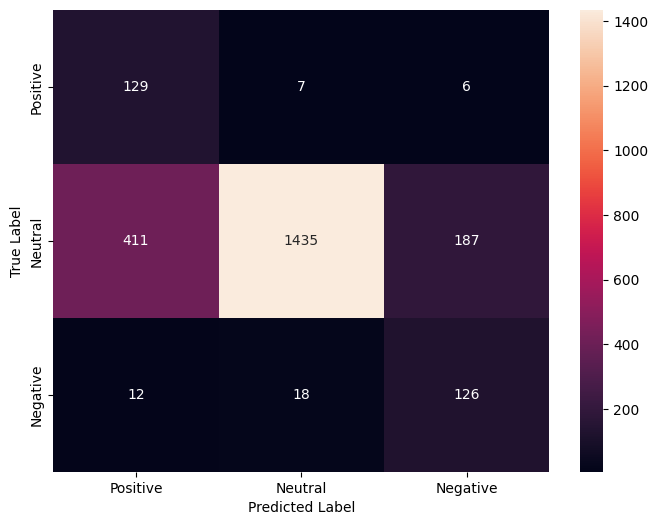

测试集上的 F1-Score: 0.7748

分类报告：
               precision    recall  f1-score   support

    Positive       0.23      0.91      0.37       142
    Negative       0.98      0.71      0.82      2033
     Neutral       0.39      0.81      0.53       156

    accuracy                           0.73      2331
   macro avg       0.54      0.81      0.57      2331
weighted avg       0.90      0.73      0.77      2331



In [115]:
#Finbert 混淆矩阵
from sklearn.metrics import confusion_matrix, f1_score, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
y_true = test_df['Encoded Label']
y_pred = test_df['pretrained_model_prediction']
cm = confusion_matrix(y_true, y_pred)
print("FinBERT 模型的混淆矩阵：\n", cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Positive", "Neutral", "Negative"],
            yticklabels=["Positive", "Neutral", "Negative"])
plt.title("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"测试集上的 F1-Score: {f1:.4f}\n")
print("分类报告：\n", classification_report(y_true, y_pred, target_names=["Positive", "Negative", "Neutral"]))

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/opt/anaconda3/lib/python3.12/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


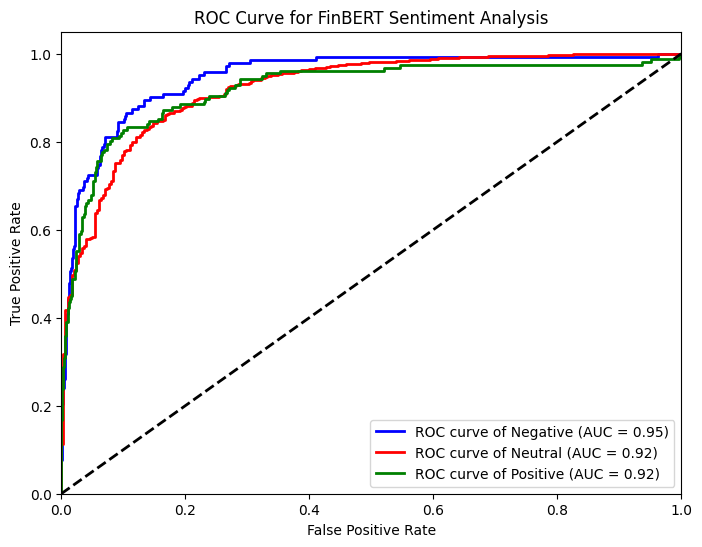

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from transformers import AutoTokenizer, pipeline

# 加载 FinBERT 预训练模型
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
sentiment_pipeline = pipeline("sentiment-analysis", model="ProsusAI/finbert", tokenizer=tokenizer, return_all_scores=True)

# 获取测试集的概率预测
def get_sentiment_probs(text):
    """ 返回 FinBERT 预测的所有类别概率 """
    scores = sentiment_pipeline(text)  # 返回 [{label, score}, {label, score}, {label, score}]
    scores_dict = {s['label']: s['score'] for s in scores[0]}  # 转换为 {'positive': 0.9, 'neutral': 0.08, 'negative': 0.02}
    return [scores_dict[label] for label in ['negative', 'neutral', 'positive']]  # 按固定顺序返回概率值

# 计算概率并存入 DataFrame
test_df['FinBERT_probs'] = test_df['Text'].apply(get_sentiment_probs)
probs = np.vstack(test_df['FinBERT_probs'].values)  # 转换为 NumPy 矩阵

# 真实标签 (Label) 是数值型（0,1,2）
y_test = test_df['Label'].values  # 直接取数值标签

# 初始化变量
fpr, tpr, roc_auc = {}, {}, {}
colors = ['blue', 'red', 'green']  # 颜色
class_names = ['Negative', 'Neutral', 'Positive']  # 类别名称

# 计算 ROC 曲线和 AUC
for i in range(3):
    y_true = (y_test == i).astype(int)  # 真实标签二值化
    fpr[i], tpr[i], _ = roc_curve(y_true, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
for i, color, class_name in zip(range(3), colors, class_names):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,  # 线条粗细调整为2
             label=f'ROC curve of {class_name} (AUC = {roc_auc[i]:.2f})')

# 绘制对角线
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # 线条调整为2

# 设置图形属性
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for FinBERT Sentiment Analysis')
plt.legend(loc="lower right")
plt.show()